In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from sklearn.metrics import classification_report
import os
import numpy as np
import pandas as pd

In [2]:
# Define the folder paths for the dataset
base_dir = 'E:/Godentist Dataset Capstone/Dataset Clear/tampak_atas'
folder_paths = {
    'Gigi Sehat': os.path.join(base_dir, 'Gigi Sehat'),
    'Plak Gigi': os.path.join(base_dir, 'Plak Gigi'),
    'Gigi Berlubang': os.path.join(base_dir, 'Gigi Berlubang'),
    'Bengkak Gusi': os.path.join(base_dir, 'Bengkak Gusi'),
    'Bukan Gambar Gigi': os.path.join(base_dir, 'Bukan Gambar Gigi')
}

In [3]:
# Create main dataset directory
base_dataset_dir = 'E:/Godentist Dataset Capstone/Dataset Clear'
os.makedirs(base_dataset_dir, exist_ok=True)

# Create subdirectories for training, validation, and test sets
train_dir = os.path.join(base_dataset_dir, 'train')
val_dir = os.path.join(base_dataset_dir, 'val')
test_dir = os.path.join(base_dataset_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [4]:
# Function to split data and copy images to train/val/test directories
def split_and_copy_images(folder_paths, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
    from sklearn.model_selection import train_test_split
    import shutil

    for label, folder_path in folder_paths.items():
        image_files = os.listdir(folder_path)
        train_files, temp_files = train_test_split(image_files, test_size=(val_size + test_size), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=test_size/(val_size + test_size), random_state=42)

        # Create label directories in train, val, and test folders
        train_label_dir = os.path.join(train_dir, label)
        val_label_dir = os.path.join(val_dir, label)
        test_label_dir = os.path.join(test_dir, label)
        os.makedirs(train_label_dir, exist_ok=True)
        os.makedirs(val_label_dir, exist_ok=True)
        os.makedirs(test_label_dir, exist_ok=True)

        # Copy train images
        for image_file in train_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(train_label_dir, image_file))

        # Copy val images
        for image_file in val_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(val_label_dir, image_file))

        # Copy test images
        for image_file in test_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(test_label_dir, image_file))

# Split data and create dataset
split_and_copy_images(folder_paths, train_dir, val_dir, test_dir)

print("Dataset split into training, validation, and test sets successfully!")

Dataset split into training, validation, and test sets successfully!


In [6]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 2044


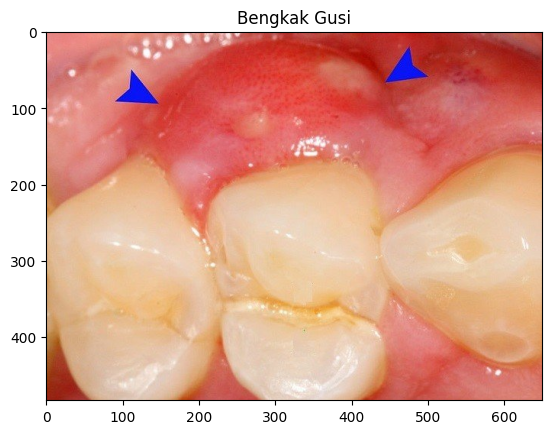

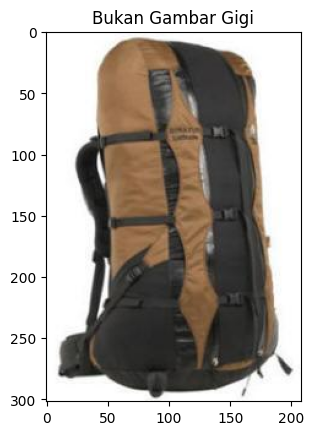

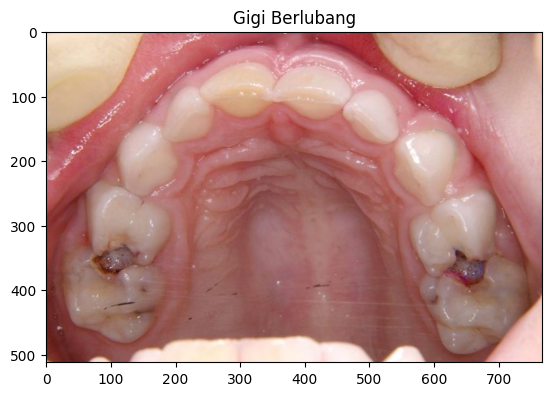

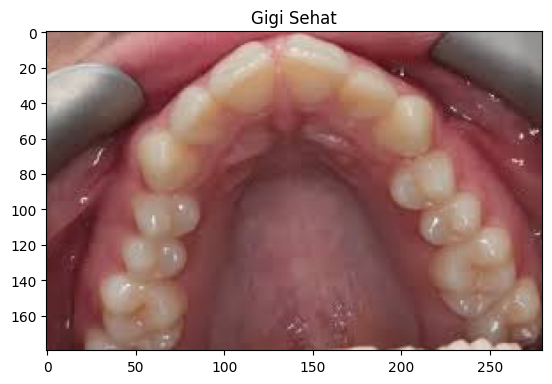

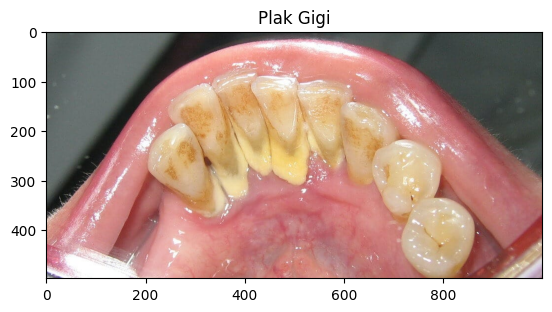

In [7]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg


img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [6]:
# import YOLO model
from ultralytics import YOLO

# Define YOLO model and train
model = YOLO('yolov8n-cls.pt')  # Specify the model version as needed

# Train the model
results = model.train(data=base_dataset_dir, epochs=100, imgsz=640,device='cpu')

New https://pypi.org/project/ultralytics/8.2.21 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.20  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=E:/Godentist Dataset Capstone/Dataset Clear, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

train: Scanning E:\Godentist Dataset Capstone\Dataset Clear\train... 1430 images, 0 corrupt: 100%|██████████| 1430/1430 [00:01<00:00, 964.80it/s]

train: WARNING  E:\Godentist Dataset Capstone\Dataset Clear\train\Plak Gigi\(254).jpg: corrupt JPEG restored and saved


train: New cache created: E:\Godentist Dataset Capstone\Dataset Clear\train.cache


val: Scanning E:\Godentist Dataset Capstone\Dataset Clear\val... 409 images, 0 corrupt: 100%|██████████| 409/409 [00:00<00:00, 904.91it/s]

val: WARNING  E:\Godentist Dataset Capstone\Dataset Clear\val\Plak Gigi\(173).jpg: corrupt JPEG restored and saved
val: New cache created: E:\Godentist Dataset Capstone\Dataset Clear\val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\classify\train3
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G       1.35          6        640: 100%|██████████| 90/90 [06:30<00:00,  4.34s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:41<00:00,  3.22s/it]

                   all      0.726          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G     0.6971          6        640: 100%|██████████| 90/90 [06:29<00:00,  4.33s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:39<00:00,  3.05s/it]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G     0.5475          6        640: 100%|██████████| 90/90 [06:14<00:00,  4.17s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:37<00:00,  2.87s/it]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G     0.4683          6        640: 100%|██████████| 90/90 [06:02<00:00,  4.03s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G     0.3829          6        640: 100%|██████████| 90/90 [05:30<00:00,  3.67s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:40<00:00,  3.12s/it]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G     0.3423          6        640: 100%|██████████| 90/90 [05:45<00:00,  3.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:35<00:00,  2.70s/it]

                   all      0.883          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G     0.2829          6        640: 100%|██████████| 90/90 [05:31<00:00,  3.68s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G       0.25          6        640: 100%|██████████| 90/90 [05:32<00:00,  3.70s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.59s/it]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G     0.2266          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G     0.2542          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G     0.2242          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G     0.1925          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.56s/it]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G     0.2174          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G     0.1779          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G     0.1822          6        640: 100%|██████████| 90/90 [05:28<00:00,  3.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]

                   all      0.905          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G     0.1642          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.905          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G     0.1492          6        640: 100%|██████████| 90/90 [05:27<00:00,  3.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G      0.141          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.59s/it]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G     0.1311          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G     0.1283          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.59s/it]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G     0.1396          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.67s/it]

                   all      0.912          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G     0.1129          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G     0.1083          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.63s/it]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G     0.1102          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G     0.1028          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.63s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G    0.09713          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G    0.09196          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.919          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G        0.1          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.53s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G    0.08452          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.63s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G    0.08758          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.54s/it]

                   all      0.924          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G    0.09263          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G    0.07005          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G    0.07066          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.919          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G    0.09061          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G    0.07779          6        640: 100%|██████████| 90/90 [05:39<00:00,  3.77s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:38<00:00,  2.93s/it]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G    0.07405          6        640: 100%|██████████| 90/90 [05:36<00:00,  3.73s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.59s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G    0.07213          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:35<00:00,  2.71s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G    0.06604          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.56s/it]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G    0.05325          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G    0.05328          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.59s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G    0.07823          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G    0.07264          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G     0.0589          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.67s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G    0.06406          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G    0.06916          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G    0.06444          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.54s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G    0.04521          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.61s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G    0.04159          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.54s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G    0.05953          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G    0.04873          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.54s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G     0.0422          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G    0.04538          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.56s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G    0.04301          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G    0.02681          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.54s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G    0.04288          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.63s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G     0.0438          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.54s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G    0.03628          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G    0.03088          6        640: 100%|██████████| 90/90 [05:21<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G    0.03285          6        640: 100%|██████████| 90/90 [05:21<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G    0.03595          6        640: 100%|██████████| 90/90 [05:21<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.59s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G    0.04635          6        640: 100%|██████████| 90/90 [05:21<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G    0.03582          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.54s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G    0.04012          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.63s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G    0.03657          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.55s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G    0.03768          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G    0.02937          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G      0.032          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G    0.02919          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G    0.02222          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G    0.03183          6        640: 100%|██████████| 90/90 [05:27<00:00,  3.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G    0.03575          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G    0.02816          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G    0.02887          6        640: 100%|██████████| 90/90 [05:27<00:00,  3.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.63s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G    0.02552          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.52s/it]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G    0.02928          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:36<00:00,  2.80s/it]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G    0.02591          6        640: 100%|██████████| 90/90 [05:30<00:00,  3.67s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.53s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G    0.01497          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G     0.0283          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G    0.02629          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G    0.03051          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.54s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G    0.01944          6        640: 100%|██████████| 90/90 [05:22<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G    0.02666          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:32<00:00,  2.53s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G    0.01715          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G     0.0187          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.56s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G    0.02608          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.60s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G    0.02424          6        640: 100%|██████████| 90/90 [05:23<00:00,  3.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G    0.03526          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:37<00:00,  2.87s/it]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G    0.02636          6        640: 100%|██████████| 90/90 [05:27<00:00,  3.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:35<00:00,  2.72s/it]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G    0.02191          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G    0.02546          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G    0.01747          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G    0.02518          6        640: 100%|██████████| 90/90 [05:27<00:00,  3.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G    0.01613          6        640: 100%|██████████| 90/90 [05:25<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.62s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G    0.01694          6        640: 100%|██████████| 90/90 [05:24<00:00,  3.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:33<00:00,  2.56s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G    0.02281          6        640: 100%|██████████| 90/90 [05:26<00:00,  3.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:34<00:00,  2.64s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G    0.01994          6        640: 100%|██████████| 90/90 [05:39<00:00,  3.77s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:44<00:00,  3.41s/it]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G    0.01832          6        640: 100%|██████████| 90/90 [06:41<00:00,  4.46s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:38<00:00,  2.95s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G    0.02063          6        640: 100%|██████████| 90/90 [06:49<00:00,  4.55s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:41<00:00,  3.17s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G     0.0135          6        640: 100%|██████████| 90/90 [05:59<00:00,  4.00s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:37<00:00,  2.91s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G     0.0203          6        640: 100%|██████████| 90/90 [06:00<00:00,  4.00s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:45<00:00,  3.52s/it]

                   all      0.939          1



100 epochs completed in 10.131 hours.
Optimizer stripped from runs\classify\train3\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train3\weights\best.pt, 3.0MB

Validating runs\classify\train3\weights\best.pt...
Ultralytics YOLOv8.2.20  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: E:\Godentist Dataset Capstone\Dataset Clear\train... found 1430 images in 5 classes  
val: E:\Godentist Dataset Capstone\Dataset Clear\val... found 409 images in 5 classes  
test: E:\Godentist Dataset Capstone\Dataset Clear\test... found 204 images in 5 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:37<00:00,  2.90s/it]


                   all      0.944          1
Speed: 0.0ms preprocess, 62.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train3
Results saved to runs\classify\train3


In [7]:
# Plot training results
model.val()

Ultralytics YOLOv8.2.20  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: E:\Godentist Dataset Capstone\Dataset Clear\train... found 1430 images in 5 classes  
val: E:\Godentist Dataset Capstone\Dataset Clear\val... found 409 images in 5 classes  
test: E:\Godentist Dataset Capstone\Dataset Clear\test... found 204 images in 5 classes  


val: Scanning E:\Godentist Dataset Capstone\Dataset Clear\val... 409 images, 0 corrupt: 100%|██████████| 409/409 [00:00<?, ?it/s]

val: WARNING  E:\Godentist Dataset Capstone\Dataset Clear\val\Plak Gigi\(173).jpg: corrupt JPEG restored and saved



               classes   top1_acc   top5_acc: 100%|██████████| 26/26 [00:37<00:00,  1.46s/it]


                   all      0.944          1
Speed: 0.0ms preprocess, 63.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train32


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000014DD385E0E0>
curves: []
curves_results: []
fitness: 0.9718826413154602
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9437652826309204, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9718826413154602}
save_dir: WindowsPath('runs/classify/train32')
speed: {'preprocess': 0.0, 'inference': 63.88652995046602, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9437652826309204
top5: 1.0

In [12]:
results = model("E:/Godentist Dataset Capstone/Dataset Clear/tampak_atas/Gigi Berlubang/(561).jpeg")  # predict on an image


image 1/1 E:\Godentist Dataset Capstone\Dataset Clear\tampak_atas\Gigi Berlubang\(561).jpeg: 640x640 Gigi Berlubang 1.00, Bukan Gambar Gigi 0.00, Plak Gigi 0.00, Bengkak Gusi 0.00, Gigi Sehat 0.00, 54.0ms
Speed: 15.0ms preprocess, 54.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.2.20  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)

PyTorch: starting from 'runs\classify\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5) (2.8 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success  0.6s, saved as 'runs\classify\train3\weights\best.onnx' (5.5 MB)

Export complete (2.3s)
Results saved to D:\R\Phyton\Bangkit Capstone\runs\classify\train3\weights
Predict:         yolo predict task=classify model=runs\classify\train3\weights\best.onnx imgsz=640  
Validate:        yolo val task=classify model=runs\classify\train3\weights\best.onnx imgsz=640 data=E:/Godentist Dataset Capstone/Dataset Clear  
Visualize:       https://netron.app


In [9]:
path

'runs\\classify\\train3\\weights\\best.onnx'